<a href="https://colab.research.google.com/github/Azad-Me/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/yes_bank_stock_closing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Yes Bank Stock Closing Price Prediction.



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Yes Bank was a very reputed bank till 2018. After 2018, the bank came under the umbrella of risk inflated banks. This project would help not only ys bank but to all those banks who want to predict their future who are under connundrum for their future. So Machine Learning is helping us to resolve the issue of all those companies and firms who want to gather some courage in order to survive in the market for longer time.\
By predicting the price with the acquinatance of Machine Learning espicially the linear Regression and other regressors, which helped firms and companies.\
In this project the  monthly Open,Close,Low and High prices of Yess Bank stock have helped to train the model on which learning occured and then the respective prediction occurs.

# **GitHub Link -**

https://github.com/Azad-Me/Yes-Bank-Stock-Closing-Price-Prediction

# **Problem Statement**


Yes Bank is  well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock proces of the company and whether Time Series models or any other preidictive models can do justice to such situations. This Dataset has monthly stock prices of the bank since its inception and includes closing starting, highest and lowest stock prices of every month. The main ibjective is to predict the stock's price of the month.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as miss

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore') 

In [3]:
from scipy.stats import *
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet

In [4]:
!pip install plotly.express
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [5]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/MyDrive/dat/Dataset'
first_df= pd.read_csv( path + '/data_YesBank_StockPrices.csv')

### Dataset First View

In [7]:
# Dataset First Look
first_df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
print(len(first_df.columns))
print(len(first_df['Date']))

5
185


### Dataset Information

In [9]:
# Dataset Info
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
len(first_df[first_df.duplicated()])

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
for i in first_df.columns:
  print(f' {i} - {len(first_df[first_df[i].isnull()])} ')

 Date - 0 
 Open - 0 
 High - 0 
 Low - 0 
 Close - 0 


<Axes: >

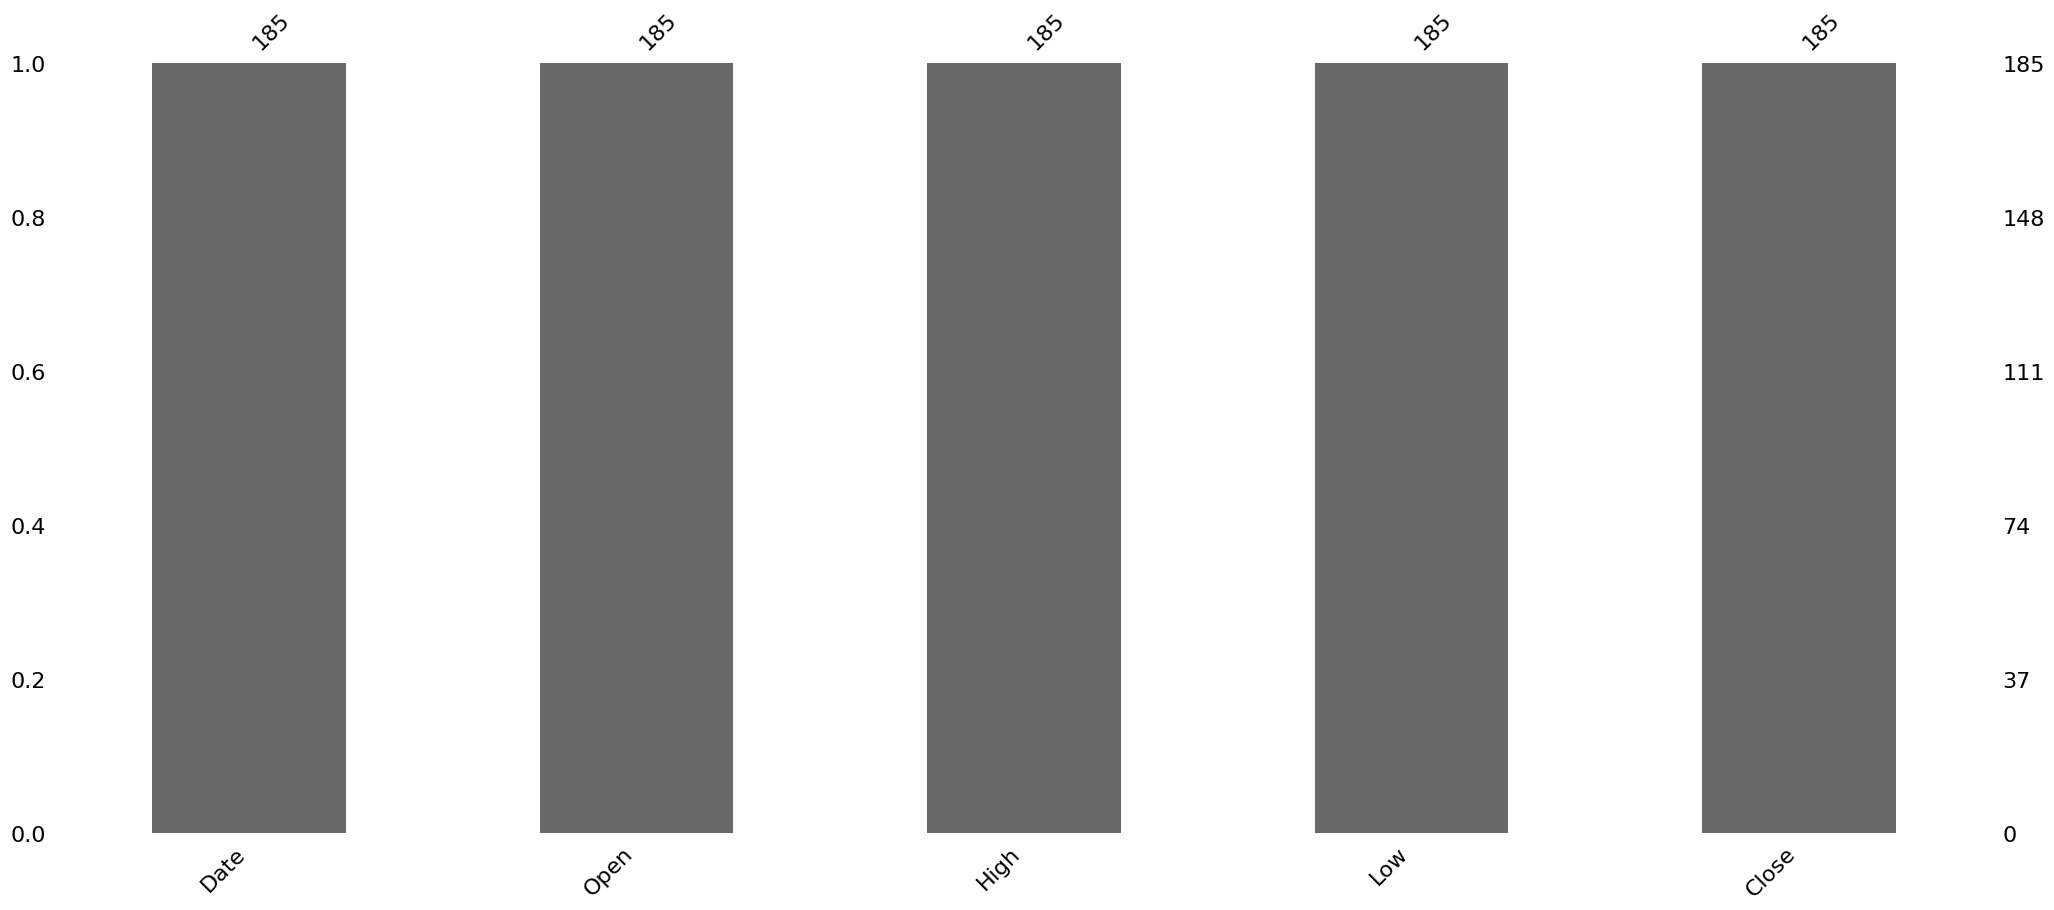

In [12]:
# Visualizing the missing values

miss.bar(first_df)
     

### What did you know about your dataset?

Answer Here
The yess bank Datset contains 185 rows and 5 columns without any duplicate columns and rows. The Dataset do not consist any null values. Most of the columns are filled with every unique value.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
first_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [14]:
# Dataset Describe
first_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

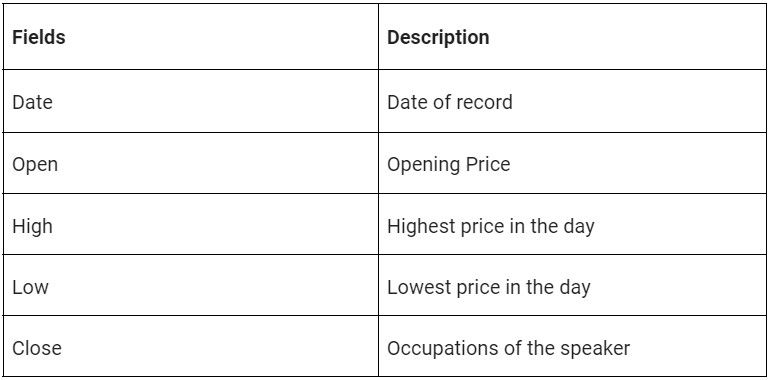

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for i in first_df.columns:
  print(f'Number of unique values in {i} is {first_df[i].nunique()} ')

Number of unique values in Date is 185 
Number of unique values in Open is 183 
Number of unique values in High is 184 
Number of unique values in Low is 183 
Number of unique values in Close is 185 


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
'''It is the user defined function for calculating the outliers.'''

def cal_out(df):
  
  for i in df.columns:
    sort = df[i].sort_values() #sorting the values

    Q1 = np.percentile(sort , 25 , interpolation='midpoint') # finding the 25 % of the given feature
    Q2 = np.percentile(sort , 50 , interpolation='midpoint') # finding the 50 % of the given feature
    Q3 = np.percentile(sort , 75 , interpolation='midpoint') # finding the 75 % of the given feature

    IQR = Q3 - Q1 # finding the interquartile range
    
    Lower_limit = Q1 - (1.5 * IQR) # applying the formula for the lower range
    Upper_limit = Q3 + (1.5 * IQR) # applying the formula for the higher range
    
    '''FInding the null values'''
    
    for j in df[i]:
      if ((j > Upper_limit) or (j < Lower_limit)) :
        second_df[i].replace( j , np.nan,inplace = True)
  
  return second_df

#### For anlysing the trend of all the features.

In [17]:
date_df=first_df.set_index('Date').copy()
date_df

,Open,High,Low,Close
Date,,,,
Jul-05,13.00,14.00,11.25,12.46
Aug-05,12.58,14.88,12.55,13.42
Sep-05,13.48,14.87,12.27,13.30
Oct-05,13.20,14.47,12.40,12.99
Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...
Jul-20,25.60,28.30,11.10,11.95
Aug-20,12.00,17.16,11.85,14.37
Sep-20,14.30,15.34,12.75,13.15


In [18]:
# Write your code to make your dataset analysis ready.
'''Using the Unstack to show the variation for individual features with proper variations.'''

unstack_df= date_df.unstack().reset_index().rename(columns= {'level_0':'Features',0:'Values'})
unstack_df

,Features,Date,Values
0,Open,Jul-05,13.00
1,Open,Aug-05,12.58
2,Open,Sep-05,13.48
3,Open,Oct-05,13.20
4,Open,Nov-05,13.35
...,...,...,...
735,Close,Jul-20,11.95
736,Close,Aug-20,14.37
737,Close,Sep-20,13.15
738,Close,Oct-20,12.42


## For Mean of the Dataset.

In [19]:
#Mean of the all features to plot and get compare.
'''This piece of code finds the mean of all feaures to understand the basic variation of datapoints.'''

mean= pd.DataFrame()
mean['features']= first_df.columns[1:]
mean['mean']= [first_df[i].mean() for i in first_df.columns if i not in 'Date']
mean

,features,mean
0,Open,105.541405
1,High,116.104324
2,Low,94.947838
3,Close,105.204703


## For Median of the Dataset.

In [20]:
'''This piece of code finds the median of all feaures to understand the basic variation of datapoints.'''

median= pd.DataFrame()
median['features']= first_df.columns[1:]
median['median']= [first_df[i].median() for i in first_df.columns if i not in 'Date']
median

,features,median
0,Open,62.98
1,High,72.55
2,Low,58.00
3,Close,62.54


## For getting the maximum and minimum values of all the features.

In [21]:
max = pd.DataFrame(columns= ['features','Maximum','Minimum'],index=range(len(first_df.columns)))
for j,i in enumerate(first_df.columns):
  if i!= 'Date':
    max['features'][j]=i
    max['Maximum'][j]=first_df[i].max()
    max['Minimum'][j]=first_df[i].min()
 
max.drop(0,axis=0)

,features,Maximum,Minimum
1,Open,369.95,10.0
2,High,404.0,11.24
3,Low,345.5,5.55
4,Close,367.9,9.98


### What all manipulations have you done and insights you found?

Answer Here.
> As the dataset is very small,extraction of  all the informatiion require very less work.

> By doing unstack the dataset is now compatible for demonstrating all the trends hidden in the Dataset.

>The functionality shows the trends of all the features. It shows all the features show same pattern while moving from april 2006 to september 2020.

> That means, the highs and lows in the stock price of yess bank shows the same pattern at the same point of time.

> Mean of the Data shows, upheavel of the stock price for short duration, pumped the price of stock . 

> But when we observe the pattern of median values, we understand the price is fluctuated for very short duration and hence the median is very low in comparision with mean.
For e.g Mean of Closing price is 105 and Median is 62, whereas the maximum and minimum price is 368 and 10 respectively.

> This shows the pumping of price for very short duration.
This shows,from jul-2016 to april-2018 the price of stock is vigorously increased and then from jul-2019, it totally slumped down. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
Analysing the distributions of all the features.

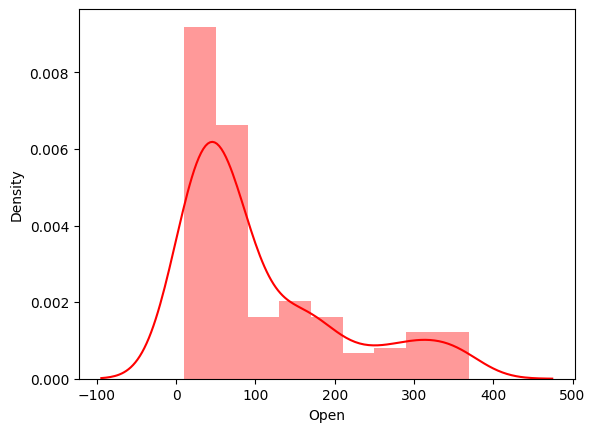

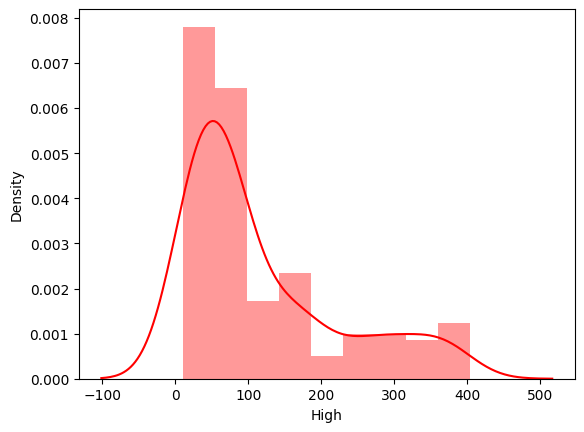

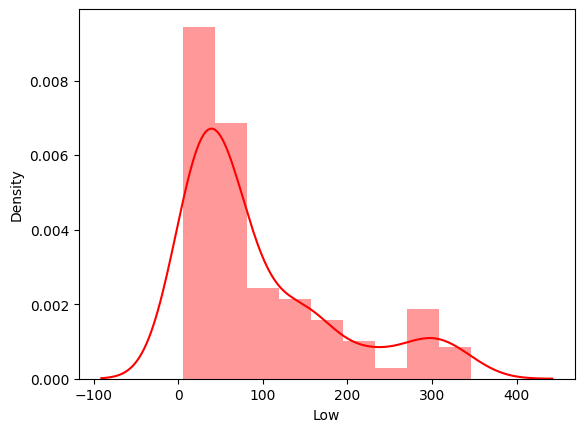

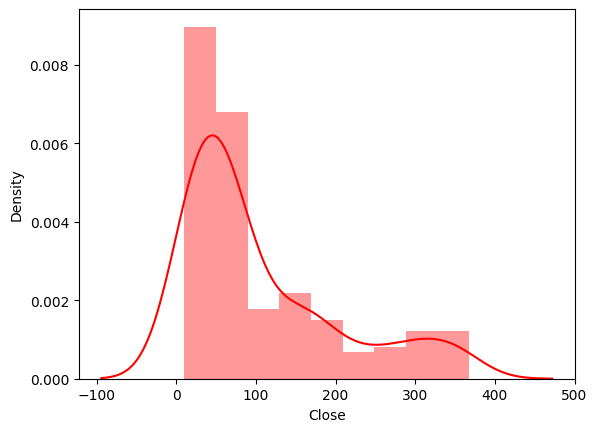

In [22]:
# Chart - 1 visualization code
for i in first_df.columns[1:]:
  sns.distplot(first_df[i],color= 'r')
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
Distplot is the best plot to draw the distribution of all the desired features.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
The features are right skewd. But the distribution do not show very high skewed ness and show a similar pattern.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.
It is helpfull to understand and decide upon the requirement of transformation of the features for Model implementation.

#### Chart - 2
Log Transformation of all the features.

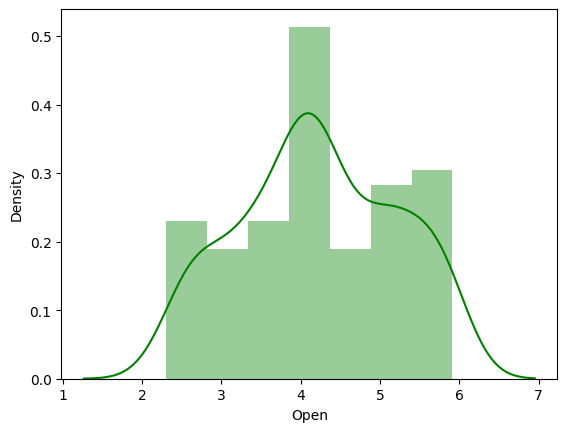

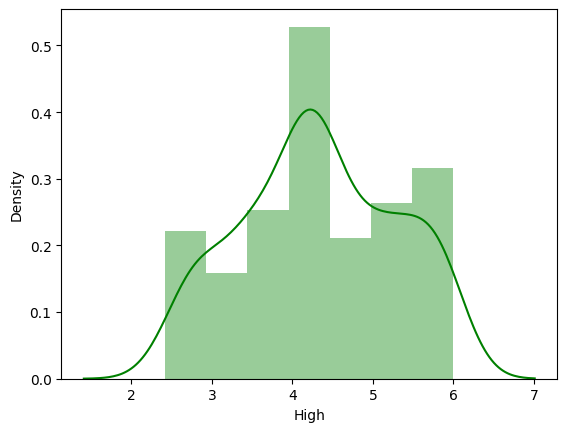

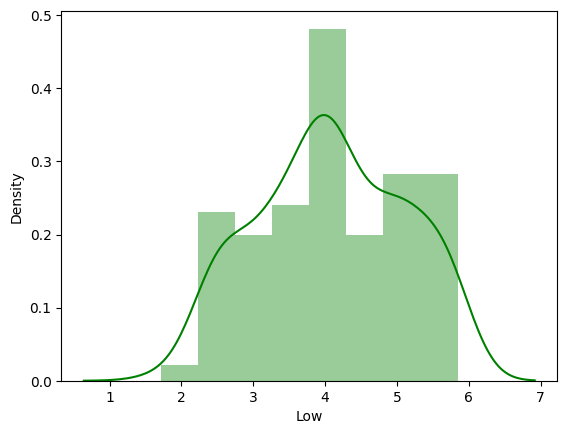

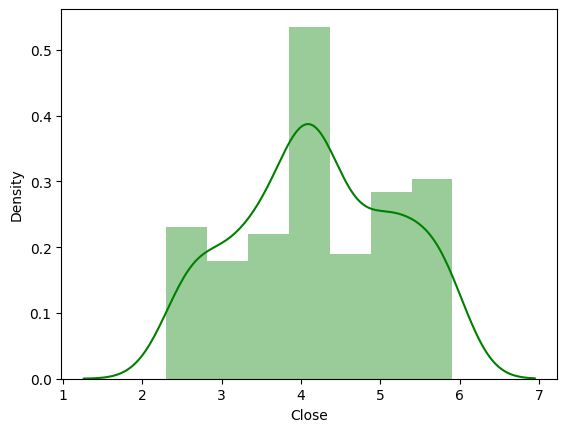

In [23]:
# Chart - 2 visualization code
for i in first_df.columns[1:]:
  
  sns.distplot(np.log(first_df[i]),color= 'g')
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
I have used the log transformation because the distribution is not much skewd, and log transformation is helpful to bring the noraml pattern in distribution of features.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.
Log transformation is sufficient to bring the noraml distribution in the Dataset. All the features show high bar at their mean. It shows the mean is pumped and the frequent points are not near to mean.\
The plot clarifies about the bubble price of Yes Bank stock remained for very less time.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here\
It helps to observe the effects of high price of stock. The inflated price at mean is temperory. The highest but one bar and other small but many bar shows, due to high price the stock suddenly come down.

#### Chart - 3

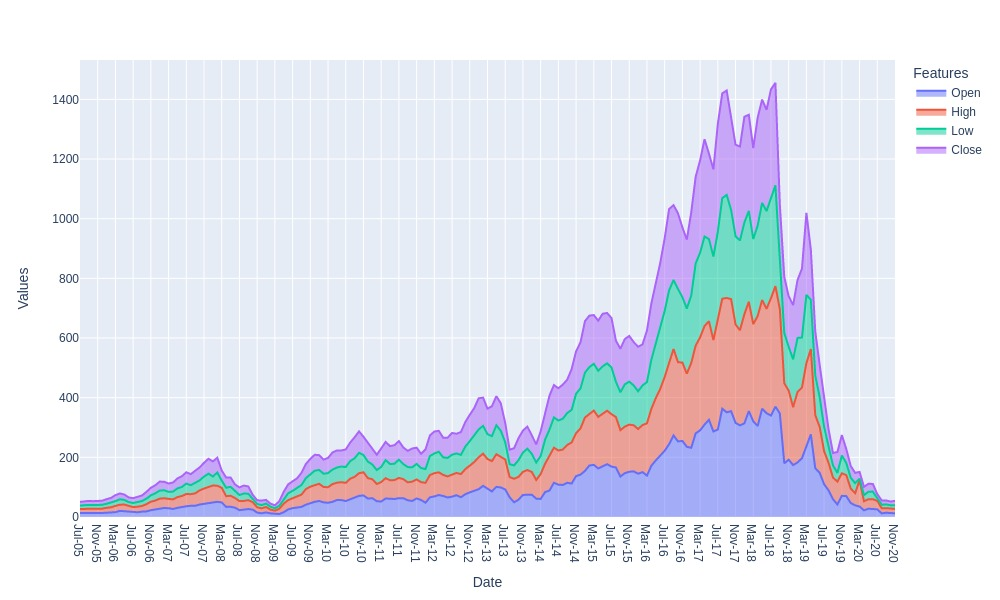

In [24]:
# Chart - 3 visualization code

fig = px.area(unstack_df, x="Date", y="Values", color="Features")
fig.update_layout(width=1000,height=600)
fig.show('jpg')

##### 1. Why did you pick the specific chart?

Answer Here.
If anyone wants to show all features and their respective trends area plot is the best choice.

##### 2. What is/are the insight(s) found from the chart?

Answer Here\
The graph shows, upto 2015 the price was controlled and balanced. 10 Years of trends were balanced and maintained. But after jul 2016 the stock starts to rise in its price, but couldn't remained very high and suddenly breaks down.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here\
It will help company to understand the reason behind the possible stock manipulation. Company will research and try to stop manipulation.

#### Chart - 4
Mean of all the Features.

In [25]:
mean

,features,mean
0,Open,105.541405
1,High,116.104324
2,Low,94.947838
3,Close,105.204703


In [26]:
import plotly.graph_objects as go

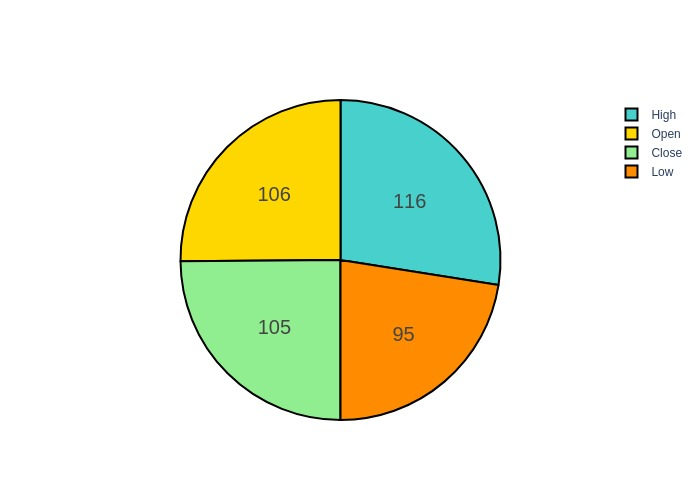

In [27]:
# Chart - 4 visualization code
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=['Open','High','Low','Close'],
                             values=mean['mean'].round())])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show('jpg')

##### 1. Why did you pick the specific chart?

Answer Here.
It is best for represent the information at once.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
All the values of mean is inflated and away from the median.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here\
It helps comapnies to understand the trends of all the features regrading the stock of yes bank.

#### Chart - 5
Analysis of the median of all the features.

In [28]:
median

,features,median
0,Open,62.98
1,High,72.55
2,Low,58.00
3,Close,62.54


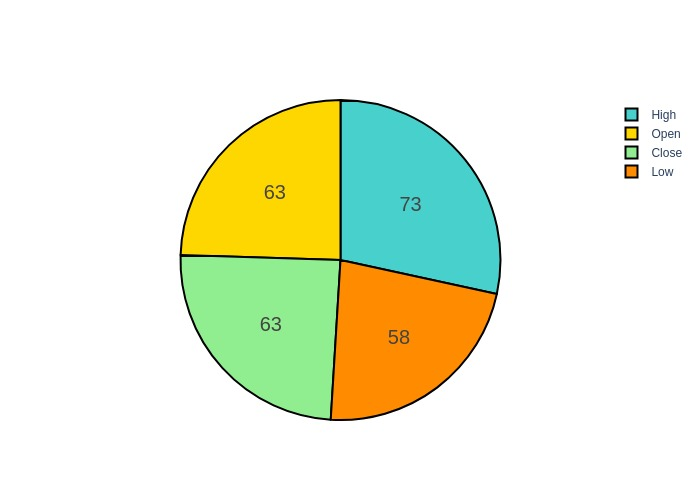

In [29]:
# Chart - 5 visualization code
median
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=['Open','High','Low','Close'],
                             values=median['median'].round())])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show('jpg')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6
Analysis for outliers detection.

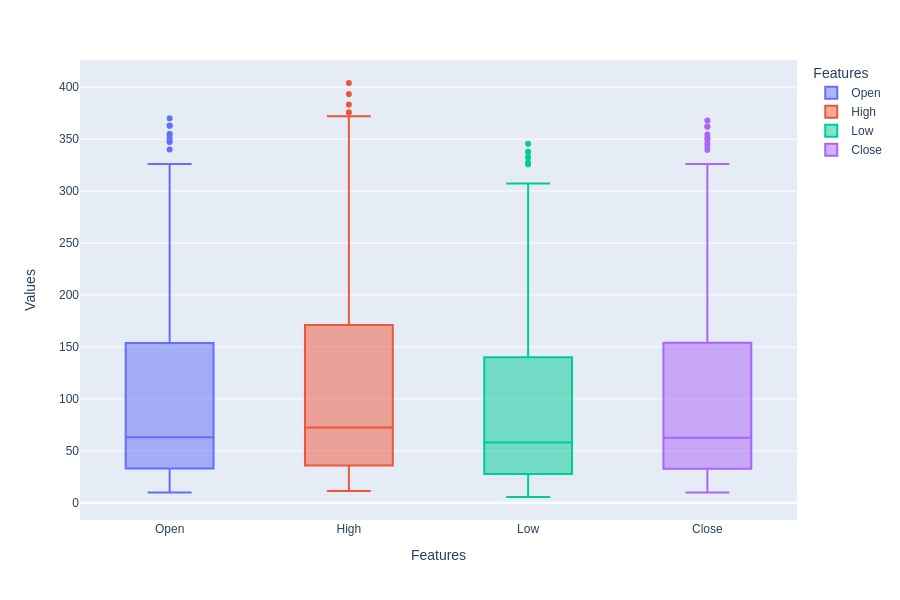

In [30]:
# Chart - 6 visualization code
fig = px.box(unstack_df, x="Features", y="Values", color="Features")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_layout(height= 600,width=900)
fig.show('jpg')

##### 1. Why did you pick the specific chart?

Answer Here.
The Dataset is small and to represent the outliers of all the feautres, above chart is best.

##### 2. What is/are the insight(s) found from the chart?

Answer Here\
The Dataset is very small and consist very less amount of outliers.
So the graph helps to decide upon the requirement of treatment of outliers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here\
yess! it helps to build a machine learning model more accurately.

#### Chart - 7
First step to detect the multicollinearity.

In [31]:
first_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

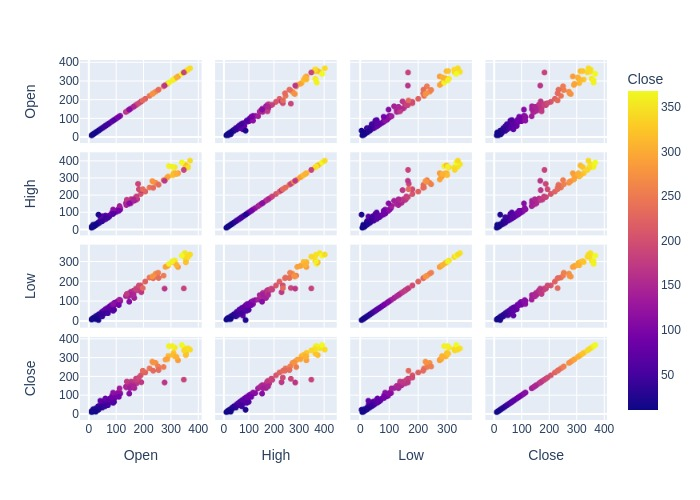

In [32]:
# Chart - 7 visualization code
fig = px.scatter_matrix(first_df.iloc[:,1:], dimensions=["Open", "High", "Low", "Close"], color="Close")
fig.show('jpg')

##### 1. Why did you pick the specific chart?

Answer Here.\
The Graph shows the simultaneous demonstration of all the features.

##### 2. What is/are the insight(s) found from the chart?

Answer Here\
Graph shows the high collinearity. Each and every columns is directly proportional to every other.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here\
It is useful to understand and get the idea about its collinearity of ots features so that we could deal with it in future model implentation.

#### Chart - 8

<Axes: >

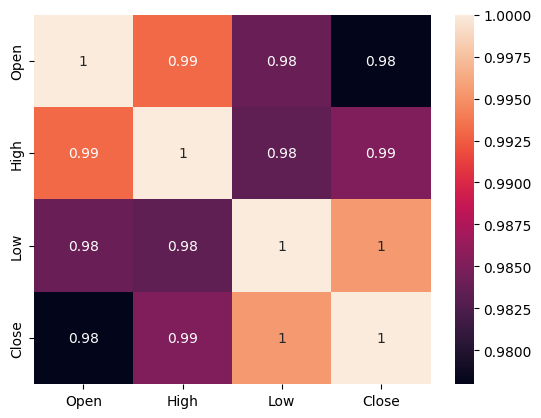

In [33]:
# Chart - 8 visualization code
cor_df=first_df.corr()
sns.heatmap(cor_df,annot= True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.\
My Null Hypothesis propound that the proportion of closing price of yes bank stock more than its mean is more than 50 % .

H0 : 50% of closing price data points are more than mean of closing price.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
''' For analysing the Null Hypothesis I am using the Proportion method.
    As the H0 is asking for 50% or more proportion where the closing price shows more price than its mean,
    we will require to extract a random sample and perform the testing.'''
    
'''first step, extracting the Dataset'''
close_df= first_df['Close'].sample(100) 

'''As we require to work on mean'''
close_rand_mean= close_df.mean()
close_rand_mean

'''Now we require to find out the existing proportion in our random sample.
   Proportion of such entries where Closing price is more than the mean of Column.'''

more_mean=[]
for i in close_df:
  if i > close_rand_mean:
    more_mean.append(i)
P = (len(more_mean)/len(close_df))
print(P)
'''Now this is the proportion of random sample, shows proportion of appliances where energy consumption is more than mean.'''

0.36


'Now this is the proportion of random sample, shows proportion of appliances where energy consumption is more than mean.'

In [35]:
''' As our Null Hypothesis asking for 50% of entries, Our proportion for population will be 50'''

P_popu = 0.5   #proportion for population
N = len(close_df)
Z_score = P-P_popu/np.sqrt(P*(1-P)/N)
print(f'Z_score is {Z_score}')

P_Value= norm.cdf(Z_score,0,1)
print(f'P_value is {P_Value}')

if P_Value > 0.05:
  print('Null Hypothesis can not be rejected as P_value is greater than significance level of 0.05 .')
else :
  print('Null Hypothesis can be rejected as P_value is lower than significance level of 0.05 .')

Z_score is -10.056666666666667
P_value is 4.292809242225389e-24
Null Hypothesis can be rejected as P_value is lower than significance level of 0.05 .


In [36]:
actual_mean=[]
for i in first_df['Close']:
  if i > first_df['Close'].mean():
    actual_mean.append(i)
print(len(actual_mean)/len(first_df['Close']))

0.33513513513513515


##### Which statistical test have you done to obtain P-Value?

Answer Here.
> I used the Proportion method to find the z score and used the noraml cumulative distribution function to find the p value.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [37]:
# Handling Missing Values & Missing Value Imputation
for i in first_df.columns:
  null = first_df[i].isnull().sum()
  print(f'the null values in column {i} {null} ')

the null values in column Date 0 
the null values in column Open 0 
the null values in column High 0 
the null values in column Low 0 
the null values in column Close 0 


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.
The dataset do not consist any null values.

### 2. Handling Outliers

In [38]:
second_df=first_df.iloc[:,1:].copy() # Copying will secure the main dataframe

In [39]:
''' Calling out the function to directly calculate the outliers'''

cal_out(second_df) # cal_out is the user defined function.

,Open,High,Low,Close
0,13.00,14.00,11.25,12.46
1,12.58,14.88,12.55,13.42
2,13.48,14.87,12.27,13.30
3,13.20,14.47,12.40,12.99
4,13.35,13.88,12.88,13.41
...,...,...,...,...
180,25.60,28.30,11.10,11.95
181,12.00,17.16,11.85,14.37
182,14.30,15.34,12.75,13.15
183,13.30,14.01,12.11,12.42


In [40]:
# As the user defined function replace all the outliers with null values, counting the null values will give the idea about outliers present.
second_df.isnull().sum()

Open     9
High     5
Low      9
Close    9
dtype: int64

In [41]:
'''Again replacing those outlier cum null values with median.'''

for i in second_df.columns:
  median_list = second_df[i].median()
  second_df[i].replace( np.nan ,median_list,inplace = True )

In [42]:
second_df.isnull().sum() # again counting the null values.

Open     0
High     0
Low      0
Close    0
dtype: int64

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.
For treatment of outliers, I used the interquartile range method. All the features have shown some amount of ouliers. I replaced those values with median so the distribution do not drastically change and should not be affected by th outliers.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [43]:
# Manipulate Features to minimize feature correlation and create new features
corr = second_df.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Open,High,Low,Close
Open,1.00,0.84,0.90,0.85
High,0.84,1.00,0.77,0.83
Low,0.90,0.77,1.00,0.94
Close,0.85,0.83,0.94,1.00


In [44]:
second_df1=pd.concat([first_df['Date'],second_df],axis=1)

In [45]:
second_df1

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [46]:
# As the presence of date column will not fit to the calculation of regression, I engineered that column and break
# it into numeric month and date values.

second_df1['New_month']=second_df1['Date']
second_df1['New_month_numeric']=second_df1['New_month']

In [47]:
'''Spliting the column by hyphen'''

for j,i in enumerate(second_df1['Date']):
  second_df1['New_month'][j]=i.split('-')[0]

for j , i in enumerate(second_df1['Date']):
  second_df1['Date'][j]= int(i.split('-')[1])


In [48]:
'''Replacing the month names with their respective digits.'''
# for e.g 8 for august


for j,i in enumerate(second_df1['New_month']):
  if i== 'Jul':
    second_df1['New_month_numeric'][j]= 7
  elif i== 'Aug':
    second_df1['New_month_numeric'][j]= 8
  elif i== 'Sep':
    second_df1['New_month_numeric'][j]= 9
  elif i == 'Oct':
    second_df1['New_month_numeric'][j]= 10
  elif i ==  'Nov':
    second_df1['New_month_numeric'][j]= 11
  elif i == 'Dec':
    second_df1['New_month_numeric'][j]= 12
  elif i == 'Jan':
    second_df1['New_month_numeric'][j]= 1
  elif i == 'Feb':
    second_df1['New_month_numeric'][j]= 2
  elif i ==  'Mar':
    second_df1['New_month_numeric'][j]= 3
  elif i ==  'Apr':
    second_df1['New_month_numeric'][j]= 4
  elif i == 'May':
    second_df1['New_month_numeric'][j]= 5
  elif i == 'Jun':
    second_df1['New_month_numeric'][j]= 6
  else:
    pass

In [49]:
second_df1

,Date,Open,High,Low,Close,New_month,New_month_numeric
0,5,13.00,14.00,11.25,12.46,Jul,7
1,5,12.58,14.88,12.55,13.42,Aug,8
2,5,13.48,14.87,12.27,13.30,Sep,9
3,5,13.20,14.47,12.40,12.99,Oct,10
4,5,13.35,13.88,12.88,13.41,Nov,11
...,...,...,...,...,...,...,...
180,20,25.60,28.30,11.10,11.95,Jul,7
181,20,12.00,17.16,11.85,14.37,Aug,8
182,20,14.30,15.34,12.75,13.15,Sep,9
183,20,13.30,14.01,12.11,12.42,Oct,10


#### 2. Feature Selection

In [50]:
# Select your features wisely to avoid overfitting
'''The following is the feature selection for independent and dependent variable.'''

independent_variable= [i for i in second_df1.columns if i not in ['New_month','Close']]
dependent_variable= 'Close'

##### Which all features you found important and why?

Answer Here.
> 'Date',  'Open',  'High',  'Low' ,  'New_month_numeric', these all features are important. These features shows maximum information.

### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [51]:
# Transform Your data
symmetric = []
skew_symmetric=[]
for i in [i for i in second_df1.columns if i not in ['New_month']]:
  if second_df1[i].mean() - second_df1[i].median() > 0.1:
    skew_symmetric.append(i)
  else:
    symmetric.append(i)
print(f'The symmetric columns are {symmetric} ')
print(f'The skew_symmetric columns are {skew_symmetric}')

The symmetric columns are ['Date', 'New_month_numeric'] 
The skew_symmetric columns are ['Open', 'High', 'Low', 'Close']


In [52]:
symmetric1 = []
skew_symmetric1=[]
for i in skew_symmetric :
  feature= np.log(second_df1[i])
  if feature.mean() - feature.median() > 0.1:
    skew_symmetric1.append(i)
  else:
    symmetric1.append(i)
print(f'The symmetric columns are {symmetric1} ')
print(f'The skew_symmetric columns are {skew_symmetric1}')


The symmetric columns are ['Open', 'High', 'Low', 'Close'] 
The skew_symmetric columns are []


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Answer Here\
At the first test the 'Open', 'High', 'Low', 'Close' were skew symmetric.
After applying the log transformation, at the second test , the features rendered as symmetric.

### 4. Data Scaling

In [53]:
second_df1['Open']= np.log(second_df1['Open'])
second_df1['High']= np.log(second_df1['High'])
second_df1['Low']= np.log(second_df1['Low'])
second_df1['Close']= np.log(second_df1['Close'])

In [54]:
second_df1

,Date,Open,High,Low,Close,New_month,New_month_numeric
0,5,2.564949,2.639057,2.420368,2.522524,Jul,7
1,5,2.532108,2.700018,2.529721,2.596746,Aug,8
2,5,2.601207,2.699346,2.507157,2.587764,Sep,9
3,5,2.580217,2.672078,2.517696,2.564180,Oct,10
4,5,2.591516,2.630449,2.555676,2.596001,Nov,11
...,...,...,...,...,...,...,...
180,20,3.242592,3.342862,2.406945,2.480731,Jul,7
181,20,2.484907,2.842581,2.472328,2.665143,Aug,8
182,20,2.660260,2.730464,2.545531,2.576422,Sep,9
183,20,2.587764,2.639771,2.494032,2.519308,Oct,10


<Axes: >

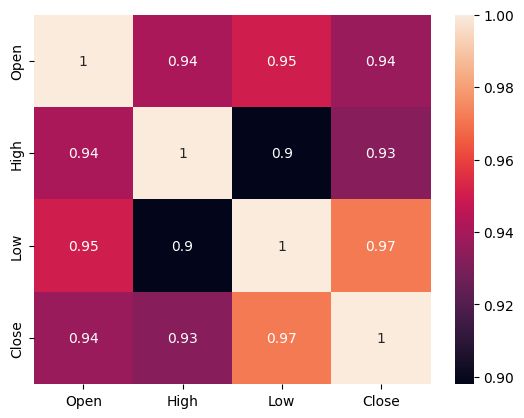

In [55]:
cor_log=second_df1[[i for i in second_df1.columns if i not in ['New_month']]].corr()
sns.heatmap(cor_log,annot=True)

In [56]:
# Scaling your data
X= second_df1[independent_variable].values
y=second_df1[dependent_variable].values

##### Which method have you used to scale you data and why?

I used Standard and MinMax Scaler.

### 5. Data Splitting

In [57]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,Y_train,Y_test = train_test_split( X ,y , test_size= 0.2,random_state=0)
print(X_train.shape,X_test.shape)
print(Y_train.shape , Y_test.shape)

(148, 5) (37, 5)
(148,) (37,)


In [58]:
scaler= MinMaxScaler()
X_train1= scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

##### What data splitting ratio have you used and why? 

Answer Here.\
For the Data spliting, the 20% data has been splitted as test data. As the data is already very small 20 % would be enough to test upon the training model.

## ***7. ML Model Implementation***

### ML Model - 1

In [59]:
# ML Model - 1 Implementation

reg  = LinearRegression()

# Fit the Algorithm
reg.fit(X_train1 , Y_train)

# Predict on the model
y_pred = reg.predict(X_test1)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart
train_accuracy = reg.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,y_pred)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)

Train accuracy is  0.9716354504983156
 Test accuracy is  0.9396769746046605


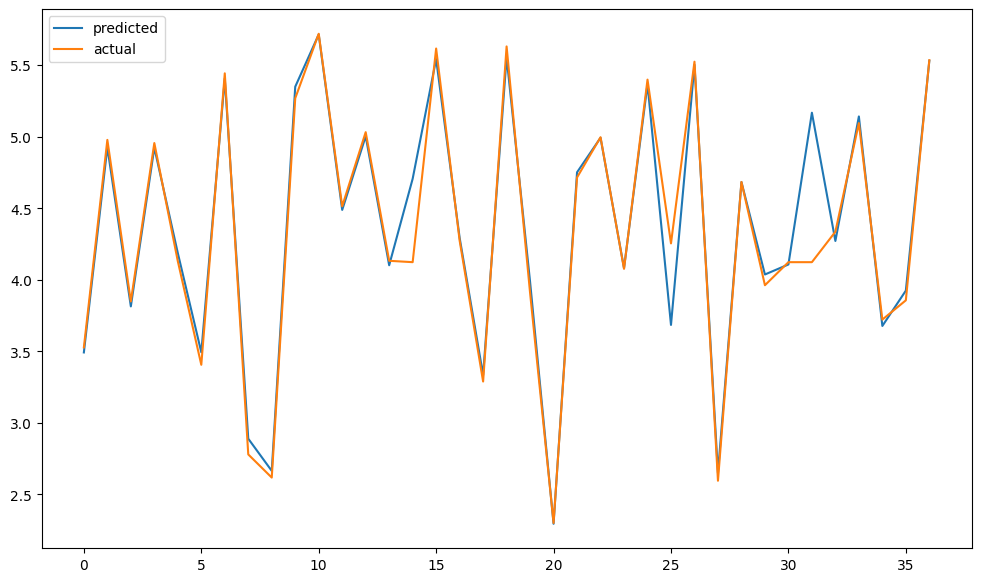

In [61]:
plt.figure(figsize=(12,7))
plt.plot(reg.predict(X_test1),label= 'predicted')
plt.plot(Y_test , label='actual')
plt.legend(loc='best')

##### The accuracy for train and test is 97%  and 94% respectively.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [62]:
# ML Model - 1 Implementation
lasso= Lasso(alpha=0.01)
# Fit the Algorithm
lasso.fit(X_train1,Y_train)


Lasso(alpha=0.01)

In [63]:
train_accuracy = lasso.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,lasso.predict(X_test1))
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)

Train accuracy is  0.9664041391801718
 Test accuracy is  0.9375702039204235


#### 2. Cross- Validation & Hyperparameter Tuning

#### Lasso and Ridge regularization. With its Cross validation and hyper parameter tuning.

In [64]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
# Fit the Algorithm

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train1, Y_train)
# Predict on the model
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.02723644921725538


In [65]:
lasso_best=Lasso(alpha = 0.001)
lasso_best.fit(X_train1,Y_train)

Lasso(alpha=0.001)

In [66]:
train_accuracy = lasso_best.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,lasso_best.predict(X_test1))
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)

Train accuracy is  0.9702635968375043
 Test accuracy is  0.9353947971464032


Text(0.5, 1.0, 'Lasso Regularization')

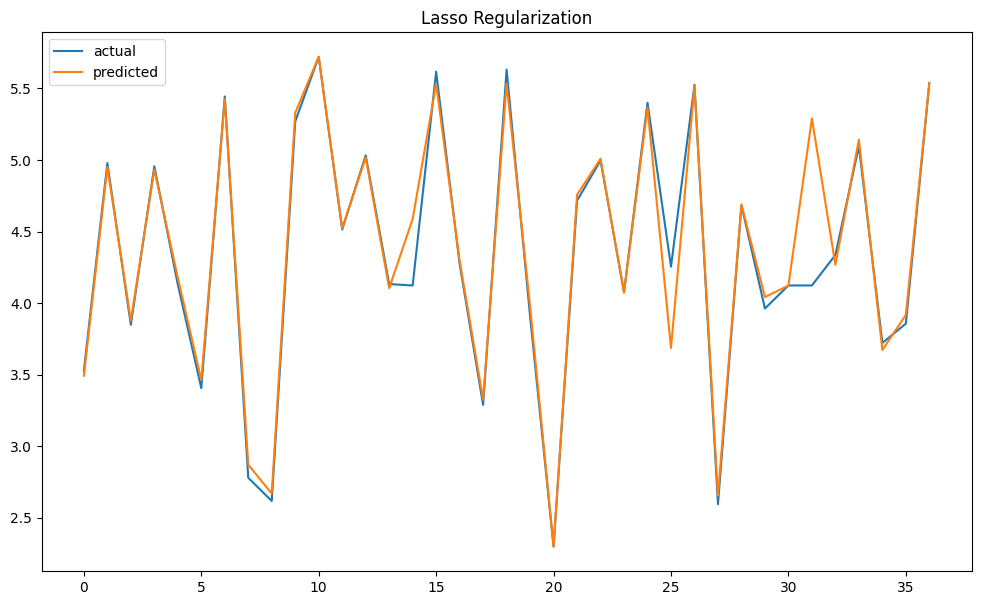

In [67]:
plt.figure(figsize=(12,7))
plt.plot(Y_test , label = 'actual')
plt.plot(lasso_best.predict(X_test1), label='predicted')
plt.legend(loc='best')
plt.title('Lasso Regularization')

#### Ridge Regularization.

In [68]:
ridge=Ridge()
ridge.fit(X_train1,Y_train)

Ridge()

In [69]:
train_accuracy = ridge.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,ridge.predict(X_test1))
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)

Train accuracy is  0.9547710204894836
 Test accuracy is  0.941838865428794


In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge_cv=Ridge()
# Fit the Algorithm

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge_cv, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train1, Y_train)
# Predict on the model
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.027604370880706417


In [71]:
ridge_best= Ridge(alpha=0.001)
ridge_best.fit(X_train1,Y_train)

Ridge(alpha=0.001)

In [72]:
train_accuracy = ridge_best.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,ridge_best.predict(X_test1))
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)

Train accuracy is  0.9716352917457212
 Test accuracy is  0.9396746562332821


Text(0.5, 1.0, 'Ridge Regularization')

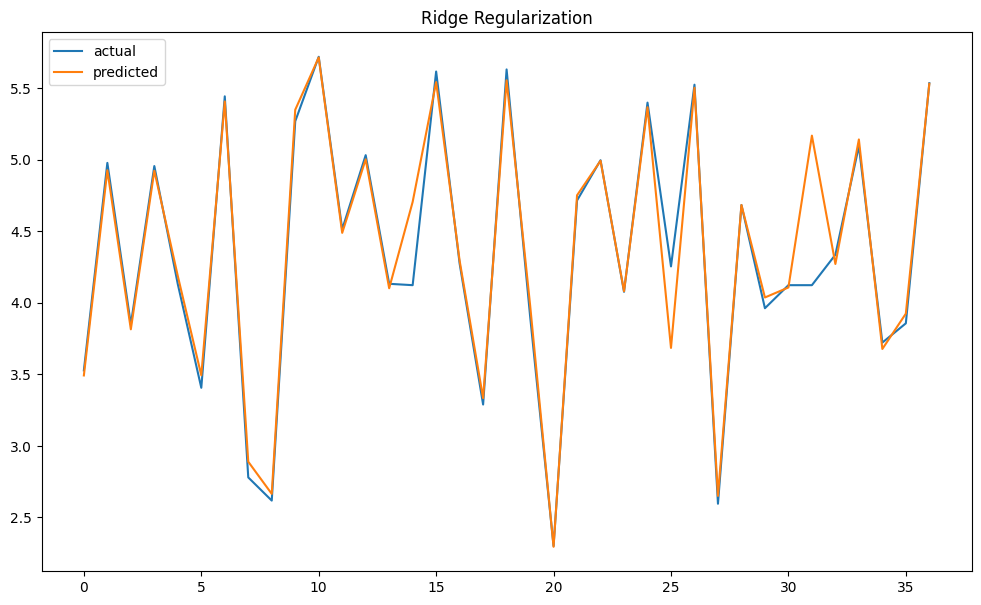

In [73]:
plt.figure(figsize=(12,7))
plt.plot(Y_test , label = 'actual')
plt.plot(ridge_best.predict(X_test1), label='predicted')
plt.legend(loc='best')
plt.title('Ridge Regularization')

##### Which hyperparameter optimization technique have you used and why?

Answer Here.
> I have used GridSearch cross validation technique. It gives functionality for parameter evaluating at the given regularizrion technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.
> In the normal Lasso regulariztion the accuracy for train and test is 96% and 94% respectively.

> But after cross validation with new value of alpha, the train and test accuracy become 97 and 93%.

> In Ridge regularization the train and test accuracy is 95% and 94% respectively.

> After cross validation the ridge accuracy for train increased to 97% and test accuracy decreased to 93%.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.\
> These all thess models, normal , lasso and ridge are predicting for more than 90% correct datapoints. 
> Thise mean the model would help Yes bank to create and predict more correct values for their stock price .

### ML Model - 3

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
# ML Model - 3 Implementation
RFR = RandomForestRegressor()

# Fit the Algorithm

RFR.fit(X_train1, Y_train)
# Predict on the model

RandomForestRegressor()

In [76]:
train_accuracy = RFR.score(X_train1, Y_train)
test_accuracy = r2_score(Y_test, RFR.predict(X_test1))
print('Train accuracy is ',train_accuracy)
print('Test accuracy is ', test_accuracy)

Train accuracy is  0.9921450617045515
Test accuracy is  0.9104604104049026


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0.5, 1.0, 'RandomForest Regularization')

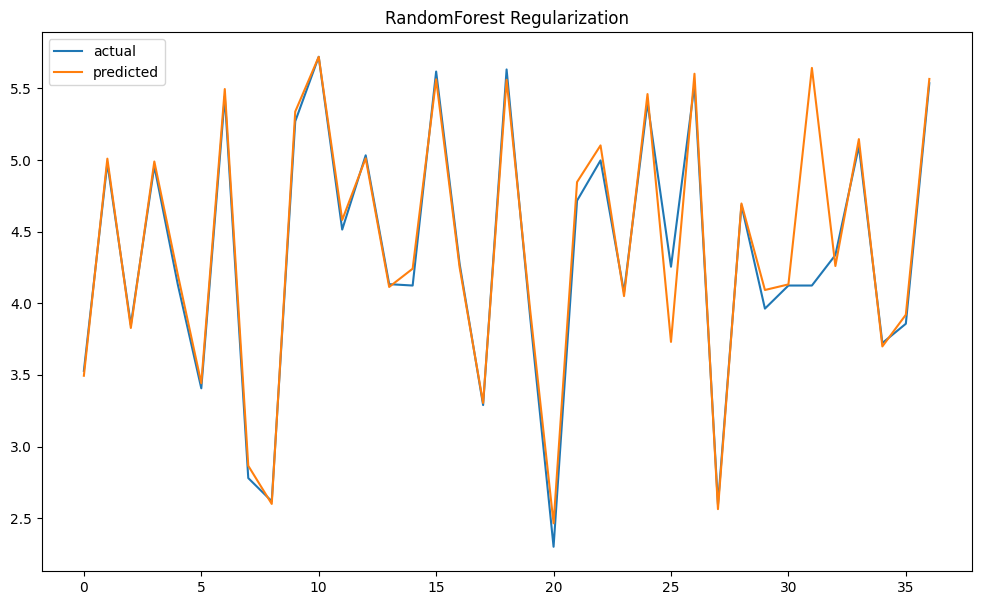

In [77]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(12,7))
plt.plot(Y_test , label = 'actual')
plt.plot(RFR.predict(X_test1), label='predicted')
plt.legend(loc='best')
plt.title('RandomForest Regularization')

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
RFR_cv = RandomForestRegressor()

# Fit the object to train dataset
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
RFR_cv_grid = GridSearchCV(RFR_cv, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the Algorithm
RFR_cv_grid.fit(X_train1, Y_train)
# Predict on the model

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [79]:
RFR_cv_grid.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [80]:
RFR_best=RandomForestRegressor(max_depth=3,n_estimators=50)
RFR_best.fit(X_train1,Y_train)

RandomForestRegressor(max_depth=3, n_estimators=50)

In [81]:
train_accuracy = RFR_best.score(X_train1, Y_train)
test_accuracy = r2_score(Y_test, RFR_best.predict(X_test1))
print('Train accuracy is ',train_accuracy)
print('Test accuracy is ', test_accuracy)

Train accuracy is  0.9724062494208064
Test accuracy is  0.9143532335478655


##### Which hyperparameter optimization technique have you used and why?

Answer Here.
> I have used GridSearch cross validation technique. It gives functionality for parameter evaluating at the given regularizrion technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.
> The model have reduced its accuracy both in terms of train and test. We could say that the model move towards more generalised fitting.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.
>The Ridge Regularization is more significant. It contains 96% training accuracy and 94% testing accuracy. The accuracy score for ridge is more than all other models, hence it will create more business significance.For testing accuracy which is 94% , training accuracy of 95% is decent and shows the level of model optimization.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.
> I considered Ridge Regularization is my final model. It shows 94 % of testing accuracy with 95% of training accuracy, which is the sign of optimal fit.This model is showing the maximum accuracy and hence I have considered it as my final model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

Text(0.5, 1.0, 'Coefficients in the Ridge Model')

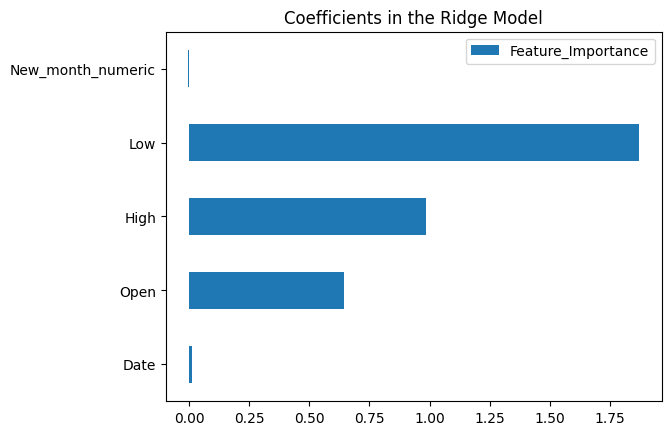

In [82]:
coef=pd.DataFrame(ridge.coef_,index=independent_variable).rename(columns={0:'Feature_Importance'})
coef.plot(kind = "barh",label='Importance')
plt.legend()
plt.title("Coefficients in the Ridge Model")


The above plot shows the feature importance for ridge regularization.
> According to the model 'Low' feature is contributing the most.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [83]:
ridge_best= Ridge(alpha=0.001)
ridge_best.fit(X_train1,Y_train)
train_accuracy=ridge_best.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,ridge_best.predict(X_test1))
print(train_accuracy)
print(test_accuracy)

0.9716352917457212
0.9396746562332821


In [84]:
import pickle

In [85]:
# Save the File
with open("Ridge_Regression.pkl", "wb") as f:
    pickle.dump(ridge_best, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [86]:
# Load the File and predict unseen data.
with open("Ridge_Regression.pkl", "rb") as f:
    unpickled_linear_model = pickle.load(f)

In [87]:
unpickled_linear_model.score(X_train1,Y_train)

0.9716352917457212

# **Conclusion**

Write the conclusion here.
> All the features are moderately correlated with each other and they are related with the target variable.

> The best Algorithm to use for this dataset is Ridge Regressor, the regularization algorithm.

> The untuned model was able to explain 95% of variance (R2 score = 0.95) on train set, while the tuned model was able to explain 97% of variance (R2 score = 0.97) on train set which is a tiny improvement of 2 %.

> On test set the model performed better untuned with 94% of accuracy, after tuning the accuracy reduced to 93 % .

> The Ridge regression is performing even better than Random Forest Regressor. The RFR is giving 90 % accuracy on test data whereas the Ridge is giving 94% accuracy.